In [1]:
import sys
sys.path.append('..')
import numpy as np
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.optimize import minimize
from core.iv import IVFitting
from models.sdm import SDM

C:\Users\lgarc\Repositories\PV_EVOLVE\notebooks\..\core\iv.py:96: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel("$V \ [V]$")
C:\Users\lgarc\Repositories\PV_EVOLVE\notebooks\..\core\iv.py:97: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("$I \ [A]$")
C:\Users\lgarc\Repositories\PV_EVOLVE\notebooks\..\models\sdm.py:214: SyntaxWarning: invalid escape sequence '\O'
  "$R_s[\Omega]$": [Rs],
C:\Users\lgarc\Repositories\PV_EVOLVE\notebooks\..\models\sdm.py:215: SyntaxWarning: invalid escape sequence '\O'
  "$R_{sh}[\Omega]$": [Rsh],


In [3]:
#An example IV curve
I = np.array([
    -0.        ,  0.10450878,  0.20174924,  0.29883212,  0.39365432,  0.48876132,
    0.58063189,  0.67312668,  0.7619365 ,  0.85144332,  0.93881064,  1.02569311,
    1.15274087,  1.27646125,  1.39816938,  1.51752591,  1.63399758,  1.74672958,
    1.85775849,  1.96586603,  2.07081001,  2.17365057,  2.27370931,  2.37115589,
    2.4667114 ,  2.55958216,  2.67932054,  2.79470092,  2.90659673,  3.01466801,
    3.11776315,  3.21848865,  3.338427  ,  3.45209852,  3.56088481,  3.66561041,
    3.76516614,  3.87772838,  3.98454524,  4.08532516,  4.19492423,  4.29812217,
    4.4073267 ,  4.50776125,  4.61180204,  4.70628452,  4.80213738,  4.89605043,
    4.98055672,  5.06142099,  5.1387154 ,  5.20928175,  5.2734483 ,  5.32983828,
    5.37597996,  5.41381773,  5.44028566,  5.45597077,  5.4599957 ,  5.46334714,
    5.46656512,  5.46959573,  5.47237181,  5.47398422,  5.47720809,  5.48096631,
    5.48510534,  5.48932401,  5.49462715,  5.50089393,  5.50611247,  5.51039728,
    5.51394336,  5.51718572,  5.52057966,  5.5232158 ,  5.5270165 ,  5.5308896 ,
    5.53865928,  5.54581707,  5.55166574,  5.55700564,  5.56134542,  5.5656181 ,
    5.56950294,  5.57258213,  5.57498796,  5.57797621,  5.58083677,  5.58324867,
    5.58563092,  5.58806733,  5.5901524
])

V = np.array([
    18.97290039, 18.92168045, 18.88222313, 18.84194183, 18.80256462, 18.76216888,
    18.72237968, 18.68163872, 18.64168167, 18.6019268 , 18.56196785, 18.52193451,
    18.46165276, 18.40220451, 18.34208488, 18.28186226, 18.22172356, 18.16170692,
    18.10146713, 18.04213715, 17.98250389, 17.9224987 , 17.86236954, 17.80190468,
    17.74180412, 17.68173599, 17.60175705, 17.52192688, 17.44225502, 17.36156654,
    17.28196144, 17.20127487, 17.10184288, 17.00346756, 16.90276909, 16.80234528,
    16.70252991, 16.5828228 , 16.462286  , 16.34210777, 16.20364189, 16.06282234,
    15.90272903, 15.74249649, 15.56212521, 15.38276577, 15.182724  , 14.96188354,
    14.74090672, 14.5012598 , 14.24082375, 13.96014786, 13.65990925, 13.33975697,
    13.00121975, 12.64070415, 12.26135159, 11.86059666, 11.46042061, 11.06035328,
    10.66065407, 10.28015327,  9.90032005,  9.52043724,  9.14137459,  8.78111172,
    8.42099571,  8.06092834,  7.72121906,  7.38084173,  7.04077148,  6.70098639,
    6.36056137,  6.02076817,  5.70047617,  5.38180923,  5.06175375,  4.74150515,
    4.42152452,  4.10132837,  3.781461  ,  3.46145344,  3.1414175 ,  2.82132792,
    2.50158596,  2.20132923,  1.9013617 ,  1.60133028,  1.30214822,  1.00240302,
    0.70218736,  0.40218264,  0.10189164
])

T = 58.05  # Temperature in °C (converted to K inside the models)
Ns = 32  # Number of cells in series (32 cells: two sub-modules, each with 16 cells)

In [15]:
#All bounds apply to a single cell.
SDM_Problem = IVFitting(
                V,
                I,
                model=SDM(
                    tm=T,
                    ns=Ns,
                    bounds={
                        'eta': (1,2),
                        'Rs': (0.001,5),
                        'Rsh': (5,1e4),
                        'Iph': (0.1,7),
                        'Isat': (1e-13,1e-2),
                    }
                ),
                fitting_error="rmse" #by default is rmse, possible options: area and rmse
            )

algorithm = DE(
    pop_size=40,
    variant="DE/best/1/bin",
    seed=41,
    CR=0.9,
    F=0.8,
    jitter=False,
)

sdm_res = minimize(
    SDM_Problem,
    algorithm,
    verbose=True
)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       40 |  7.1654072128 |  3.9589743180
     2 |       80 |  4.4646973044 |  1.9685570390
     3 |      120 |  3.1298536318 |  0.8842023326
     4 |      160 |  2.2438734558 |  0.6561121853
     5 |      200 |  1.7185765492 |  0.6497078754
     6 |      240 |  1.5105360300 |  0.6264406171
     7 |      280 |  1.2723049541 |  0.4406749204
     8 |      320 |  1.1110062908 |  0.4406749204
     9 |      360 |  0.9647080620 |  0.3316395453
    10 |      400 |  0.8826713909 |  0.3316395453
    11 |      440 |  0.8354604408 |  0.3316395453
    12 |      480 |  0.7236429550 |  0.3021933455
    13 |      520 |  0.6304968184 |  0.2093753827
    14 |      560 |  0.6121133944 |  0.2093753827
    15 |      600 |  0.5582187655 |  0.0707625489
    16 |      640 |  0.5093539035 |  0.0707625489
    17 |      680 |  0.4577614864 |  0.0707625489
    18 |      720 |  0.4019131854 |  0.0535300357
    19 |      760 |  0.3531324879 |  0.0535300357


In [17]:
#Print a table with the optimal parameters, always referring to a single cell
SDM_Problem.formatSol(sdm_res.X,latex=True)

,$I_{ph}[A]$,$I_s[A]$,$eta$,$R_s[\Omega]$,$R_{sh}[\Omega]$,$Error$
0,5.580555,0.000015,1.620942,0.141122,152.159619,0.017032


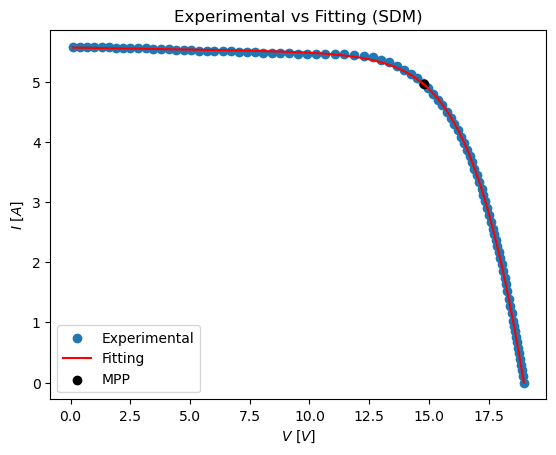

In [19]:
iv_plot = SDM_Problem.comparisonPlot(sdm_res.X)